## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---


## Import all dependencies

In [1]:
import cv2
import numpy as np
import glob 
import matplotlib.pyplot as plt
%matplotlib qt

## computing the camera calibration using chessboard images

In [25]:
def get_cal_matrix():
    '''Calculate the transformation matrix for correcting image dis'''
    nx = 9 
    ny = 6
    images = glob.glob('camera_cal/calibration*.jpg')  #fetch path of all images
    objpoints = []
    imgpoints = []
    objp = np.zeros((nx * ny, 3), np.float32)
    objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)
    for img_path in images:
        img = cv2.imread(img_path, 0)
        ret, corners = cv2.findChessboardCorners(img,
                                                (nx, ny),
                                                 None)
        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape, None, None)
    return mtx, dist

In [29]:
def cal_image(img, mtx, dist):
    '''Undistort images using transformation matrix'''
    return cv2.undistort(img, mtx, dist, None, mtx)

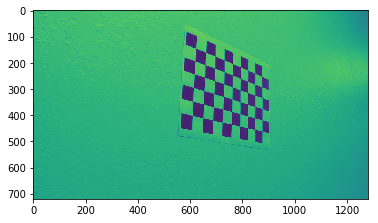

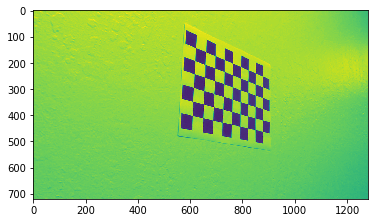

In [30]:
n = 8
img = cv2.imread(images[n],0)
mtx, dist = get_cal_matrix()
dst = cal_image(img, mtx, dist)
plt.imshow(img)
plt.figure()
plt.imshow(dst)